In [300]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [301]:
df = pd.read_csv('../all_stocks_5yr.csv')
df.head(100)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
95,2013-06-26,16.50,16.64,16.17,16.17,3604500,AAL
96,2013-06-27,16.29,16.34,16.00,16.31,3566000,AAL
97,2013-06-28,16.24,16.55,16.16,16.42,7063900,AAL
98,2013-07-01,16.50,17.04,16.48,16.80,4666900,AAL


Data Exploration

In [302]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [304]:
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [305]:
df['Name'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

Data Cleaning and Pre-Processing

In [306]:
# Dropping the Null columns
df.dropna(inplace=True)

# Changing the Date format from object to Datetime
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619029 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619029 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619029 non-null  float64       
 3   low     619029 non-null  float64       
 4   close   619029 non-null  float64       
 5   volume  619029 non-null  int64         
 6   Name    619029 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 37.8+ MB


In [307]:
# Calculating the average trade of all stocks in the dataset and sorting it in order to get the Top 10 which will be used for further analysis
data_dict = {}
print("Unique count for ticker column : " , df['Name'].nunique())
print()
for ticker in df['Name'].unique():
    avg = df[df['Name'] == ticker]['volume'].mean()
    data_dict[ticker] = avg
print("All stocks with respective avegrae trade volumes : " ,  data_dict)

sorted_items = sorted(data_dict.items(), key=lambda item: item[1], reverse=True)[:10]
top_10 = {item[0]: item[1] for item in sorted_items}
print()
print("Top 10 stocks with highest trade volume : " , top_10.keys())

Unique count for ticker column :  505

All stocks with respective avegrae trade volumes :  {'AAL': 9390321.324066719, 'AAPL': 54047899.73550437, 'AAP': 1078043.216838761, 'ABBV': 7870682.665607625, 'ABC': 2005738.3232724385, 'ABT': 6964036.691818904, 'ACN': 2596238.098490866, 'ADBE': 2998133.5996822873, 'ADI': 2451738.088959492, 'ADM': 3647857.6870532166, 'ADP': 2022774.221604448, 'ADSK': 2482750.679110405, 'ADS': 619308.5424940429, 'AEE': 1622724.4956314536, 'AEP': 2781243.0254169977, 'AES': 5568655.816521049, 'AET': 2716448.100873709, 'AFL': 2116351.5226370133, 'AGN': 2880076.8125496428, 'AIG': 8419467.383637808, 'AIV': 1198721.3010325655, 'AIZ': 545139.3129467831, 'AJG': 924431.0667196187, 'AKAM': 2182469.447180302, 'ALB': 1160881.819698173, 'ALGN': 885551.828435266, 'ALK': 1537615.6846703733, 'ALLE': 739724.4948259642, 'ALL': 2407102.868149325, 'ALXN': 1762434.8204924543, 'AMAT': 13230027.8649722, 'AMD': 32519037.79666402, 'AME': 1308148.1326449562, 'AMGN': 3465404.566322478, 'AMG'

In [308]:
top_10_stocks = ['BAC', 'AAPL', 'GE', 'F', 'FB', 'MSFT', 'AMD', 'MU', 'INTC', 'CSCO']
filtered_df = df[df['Name'].isin(top_10_stocks)]
filtered_df.reset_index(drop=True, inplace=True)
filtered_df

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
12585,2018-02-01,43.0400,44.0900,42.1000,42.4900,35713522,MU
12586,2018-02-02,42.0000,42.2100,40.6100,40.8200,40657381,MU
12587,2018-02-05,40.1400,41.5300,39.0100,39.4000,45796837,MU
12588,2018-02-06,40.5500,43.9300,40.5500,43.8800,66972802,MU


In [309]:
def plot(data, stock_name, price_type):
    data_subset = data[data['Name'] == stock_name ]
    data_subset.reset_index(drop=True, inplace=True)
    plt.figure(figsize=(16,8))
    plt.plot(data_subset[price_type])
    plt.title(f" {price_type} Price Visualization for {stock_name}")
    plt.xlabel('Days')
    plt.ylabel(f'{price_type} Price Value in USD ')
    plt.show()

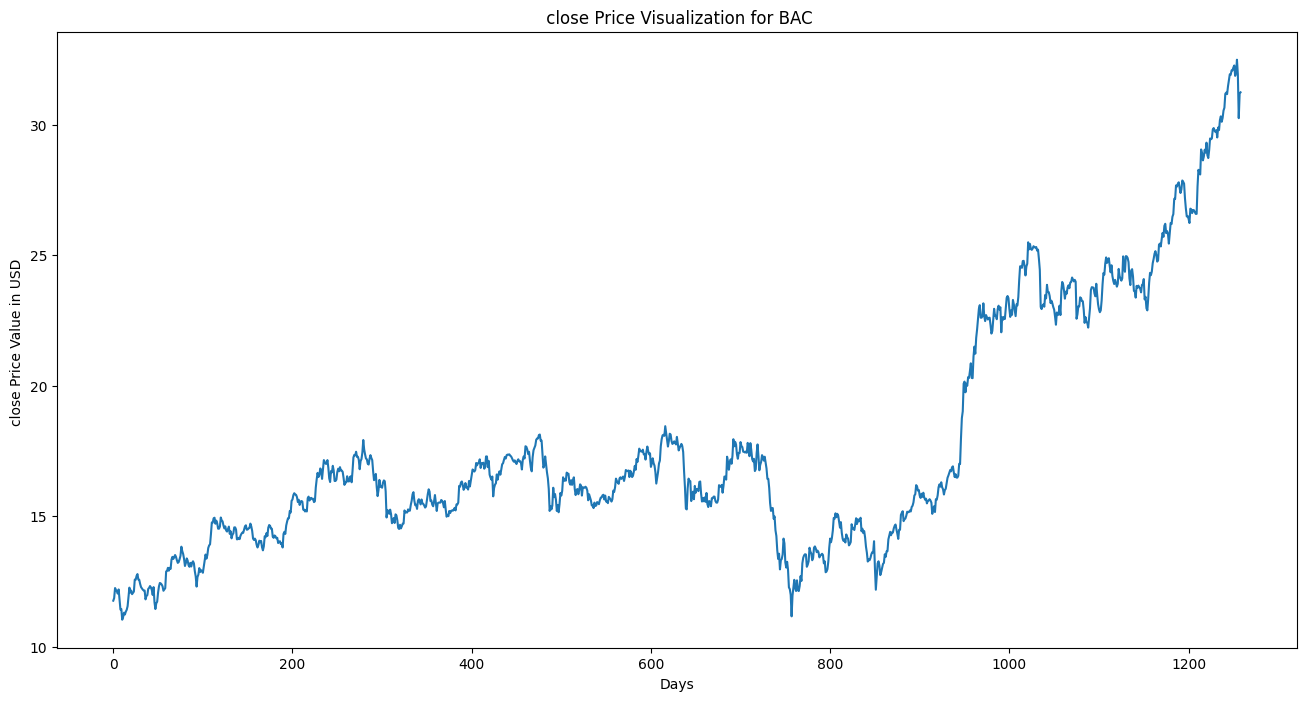

In [310]:
plot(filtered_df, 'BAC', 'close')

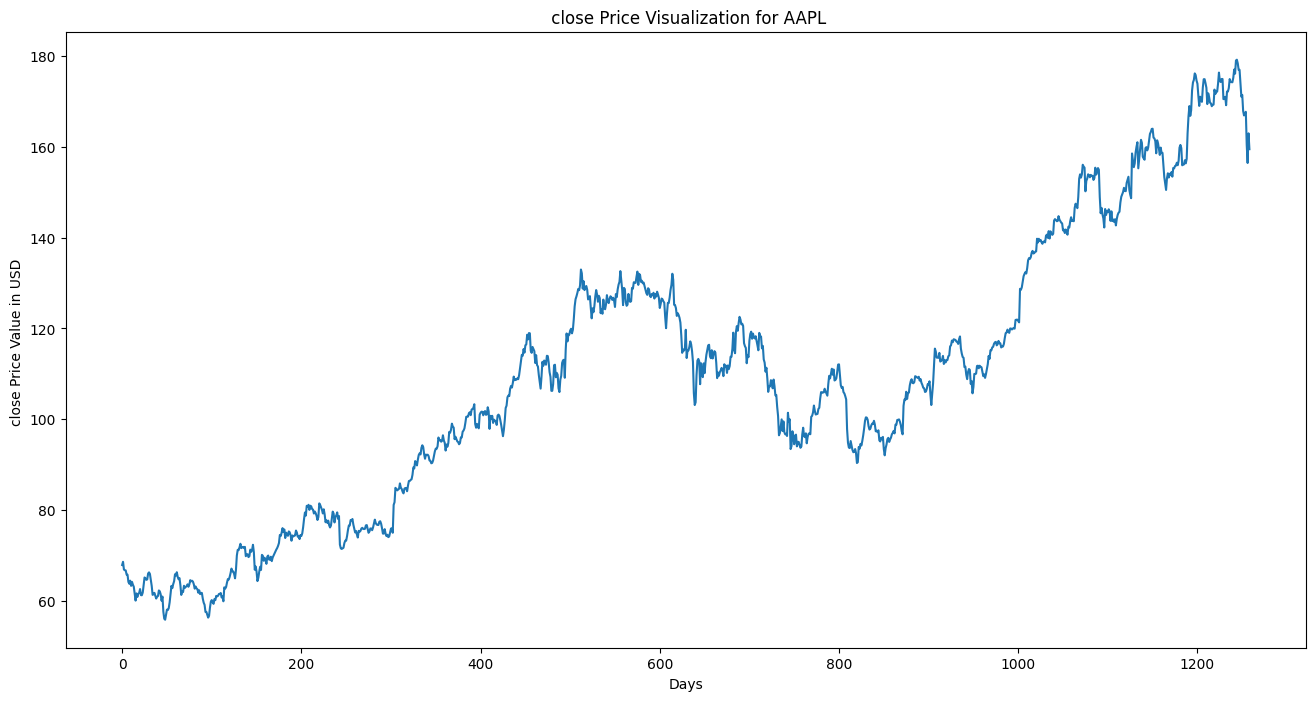

In [311]:
plot(filtered_df, 'AAPL', 'close')

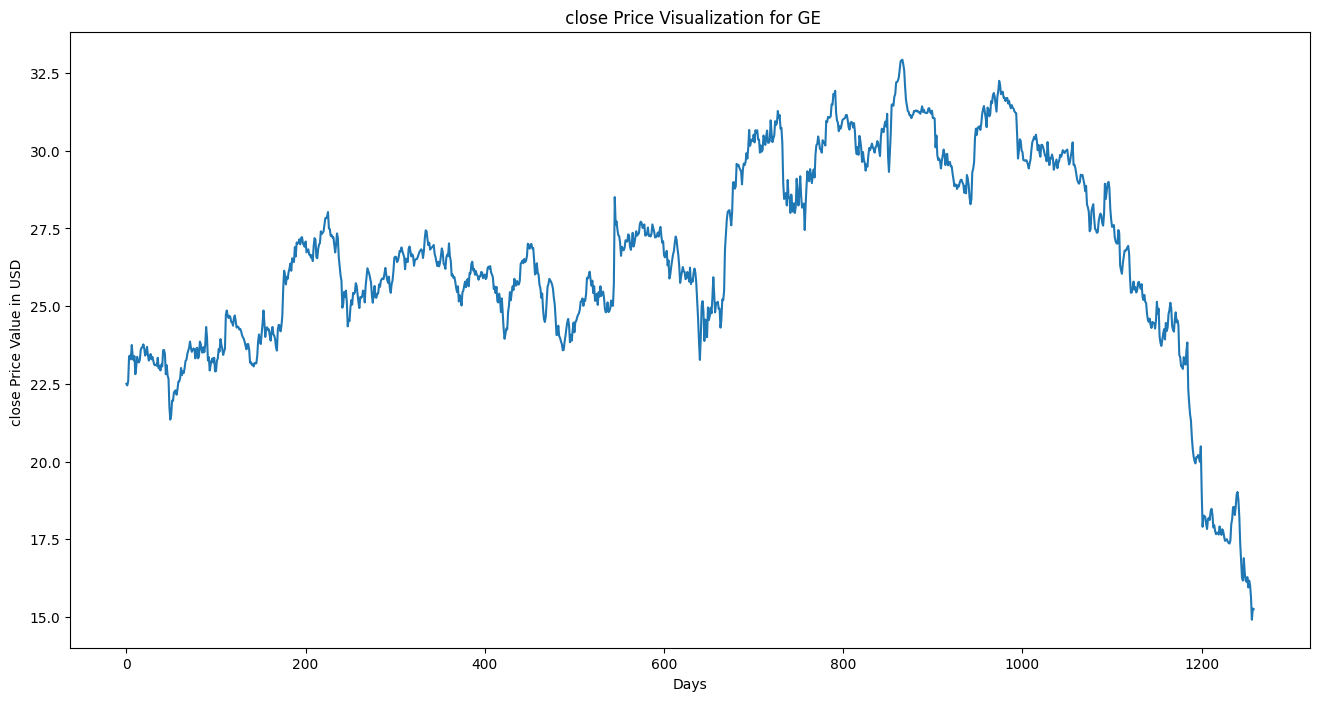

In [312]:
plot(filtered_df, 'GE', 'close')

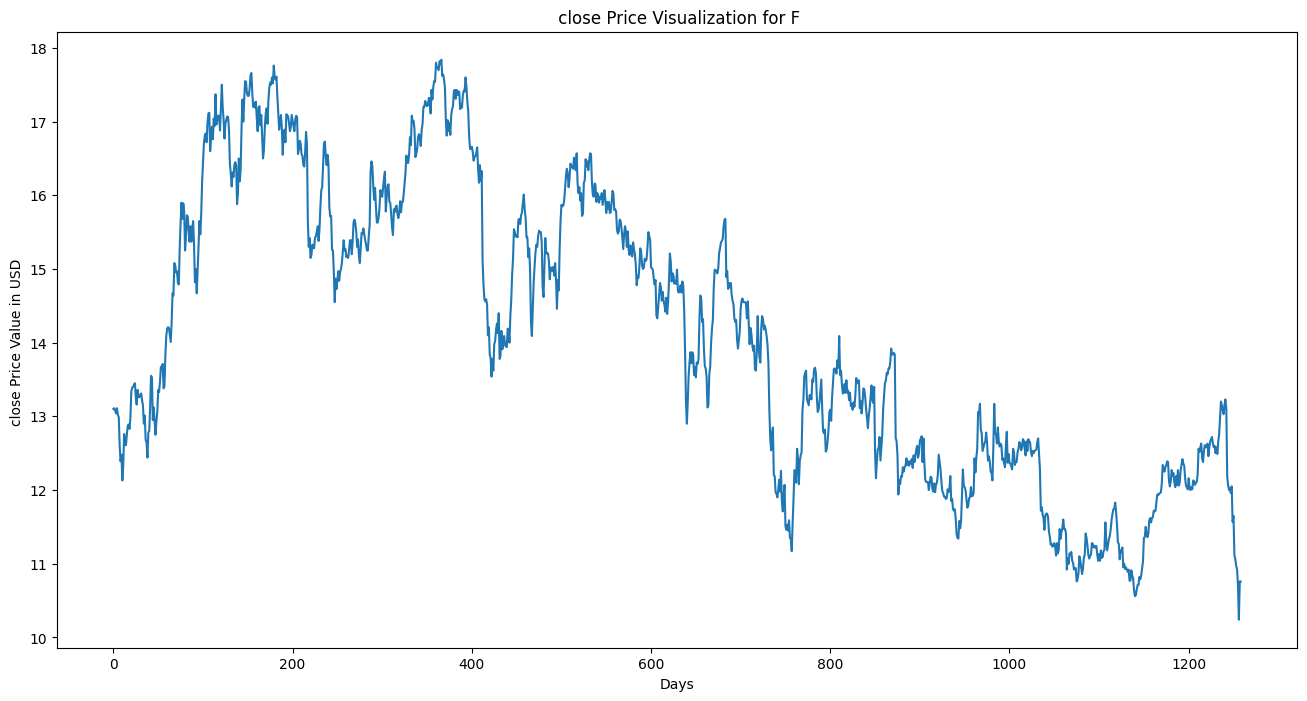

In [313]:
plot(filtered_df, 'F', 'close')

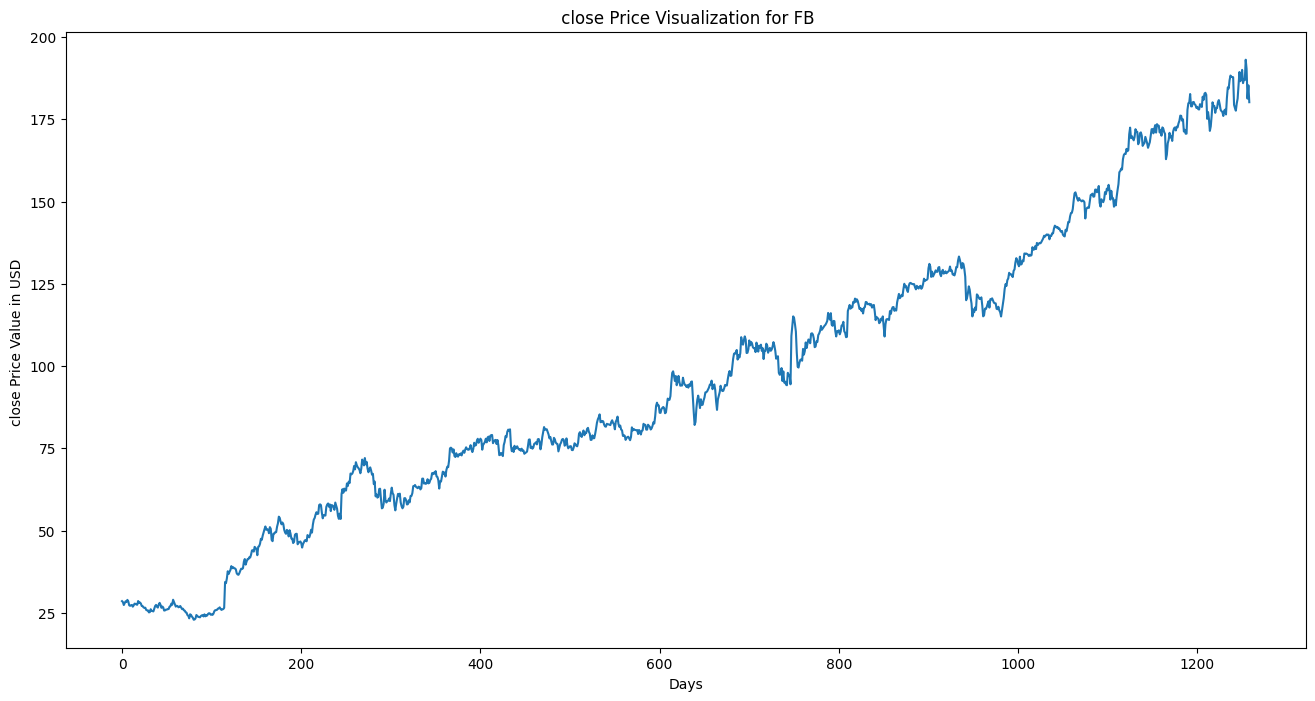

In [314]:
plot(filtered_df, 'FB', 'close')

Exploratory Data Analysis

In [315]:
def stock_basic_statistics(data, stocks):
    stock_stats = {}

    for stock in stocks:
        stock_data = data[data['Name'] == stock]
        closing_price = stock_data['close']
        opening_price = stock_data['open']
        highest_rate = stock_data['high'].max()
        lowest_rate = stock_data['low'].min()

        stock_stats[stock] = {
            'Closing Price': closing_price.mean(),
            'Opening Price': opening_price.mean(),
            'Highest Rate': highest_rate,
            'Lowest Rate': lowest_rate
        }

    return pd.DataFrame.from_dict(stock_stats, orient='index')
stock_stats = stock_basic_statistics(filtered_df, top_10_stocks)
print(stock_stats)

      Closing Price  Opening Price  Highest Rate  Lowest Rate
BAC       17.704178      17.706624         32.67      10.9800
AAPL     109.066698     109.055429        180.10      55.0142
GE        26.526342      26.529190         33.00      14.7100
F         14.102637      14.112669         18.12      10.1900
FB        96.478610      96.455059        195.32      22.6700
MSFT      51.063081      51.026394         96.07      27.2300
AMD        5.601863       5.604315         15.65       1.6100
MU        22.972593      22.985880         49.89       7.6400
INTC      31.831531      31.804532         50.85      20.1000
CSCO      27.743813      27.725160         42.98      19.9800


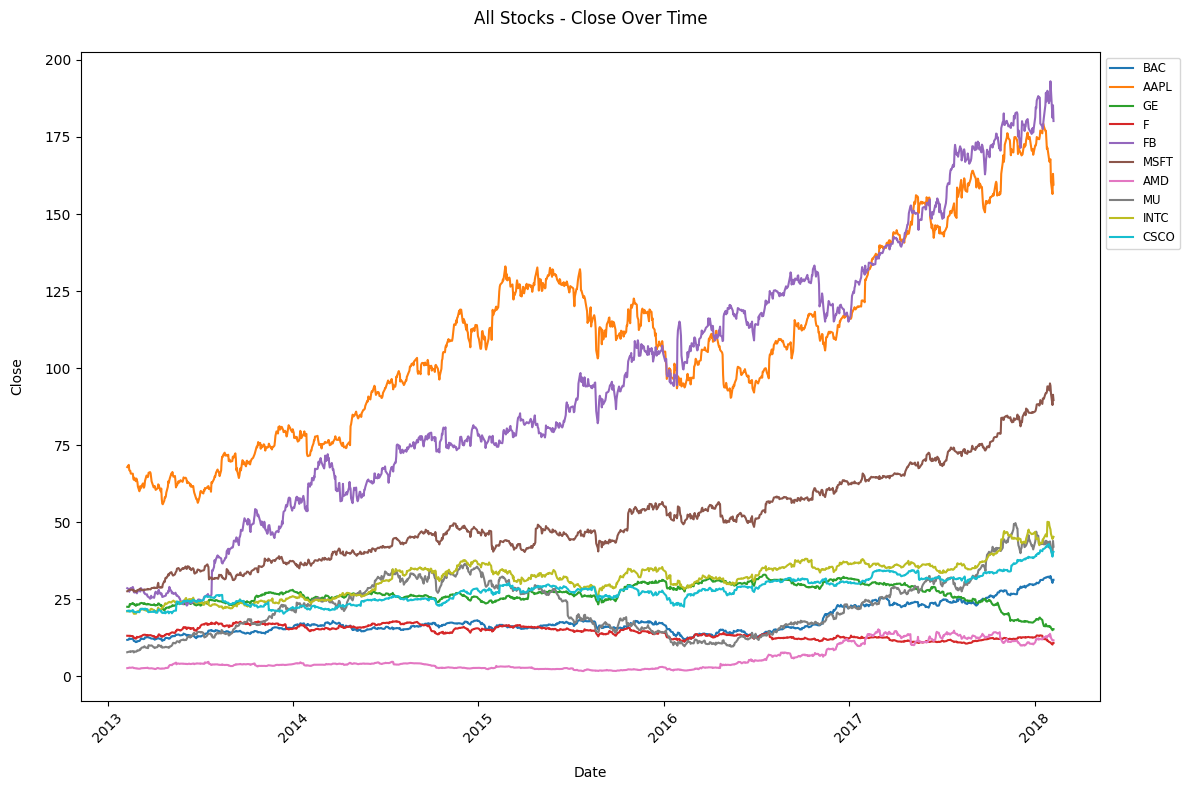

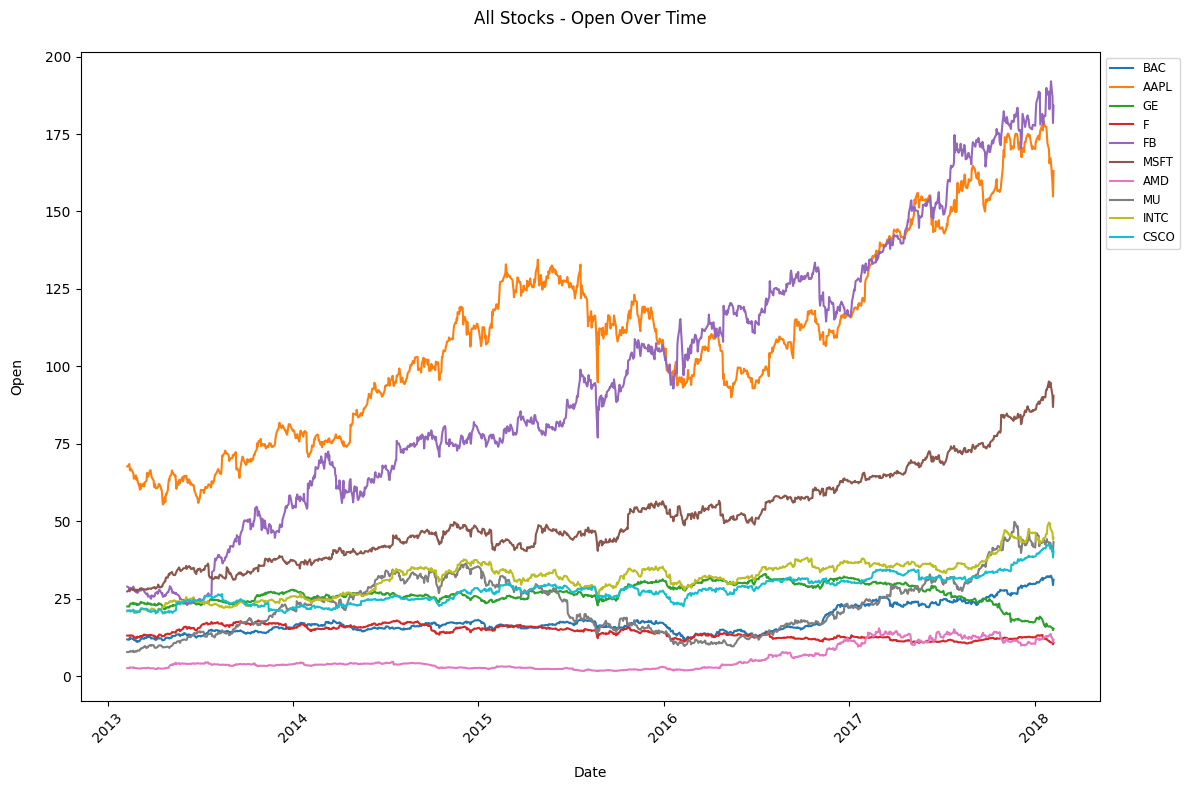

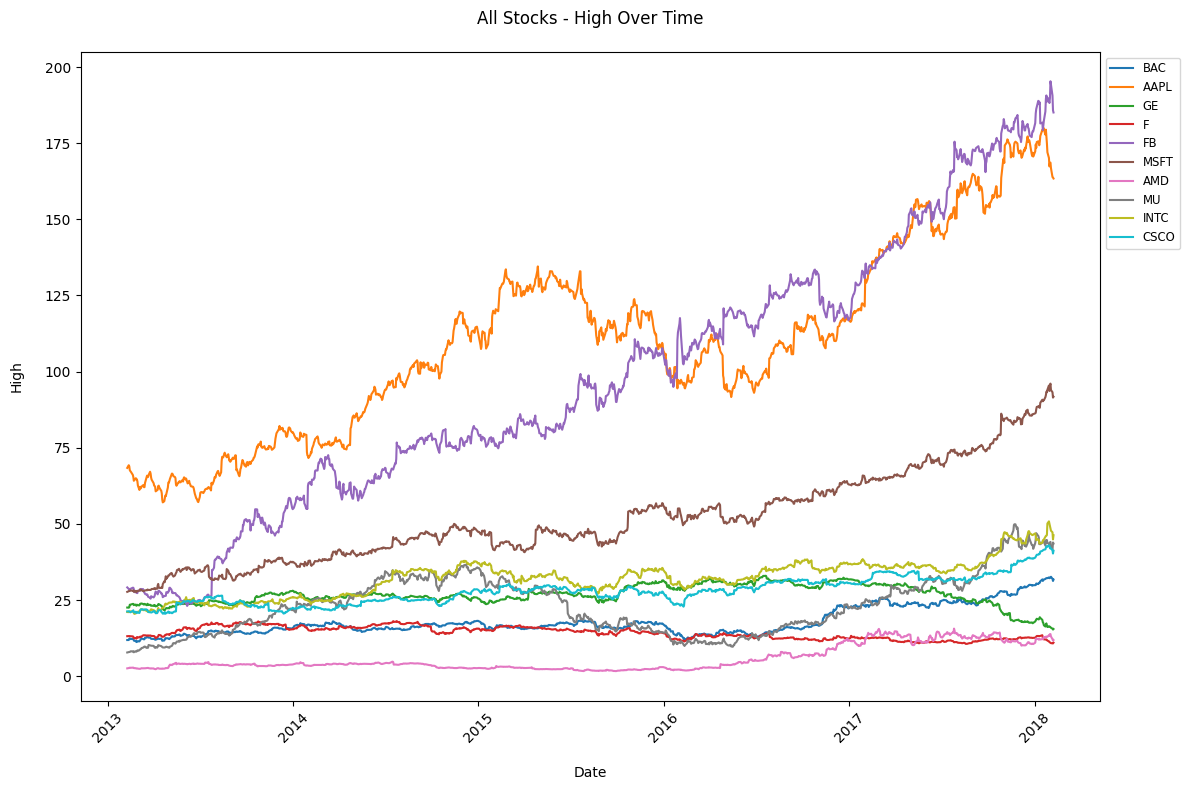

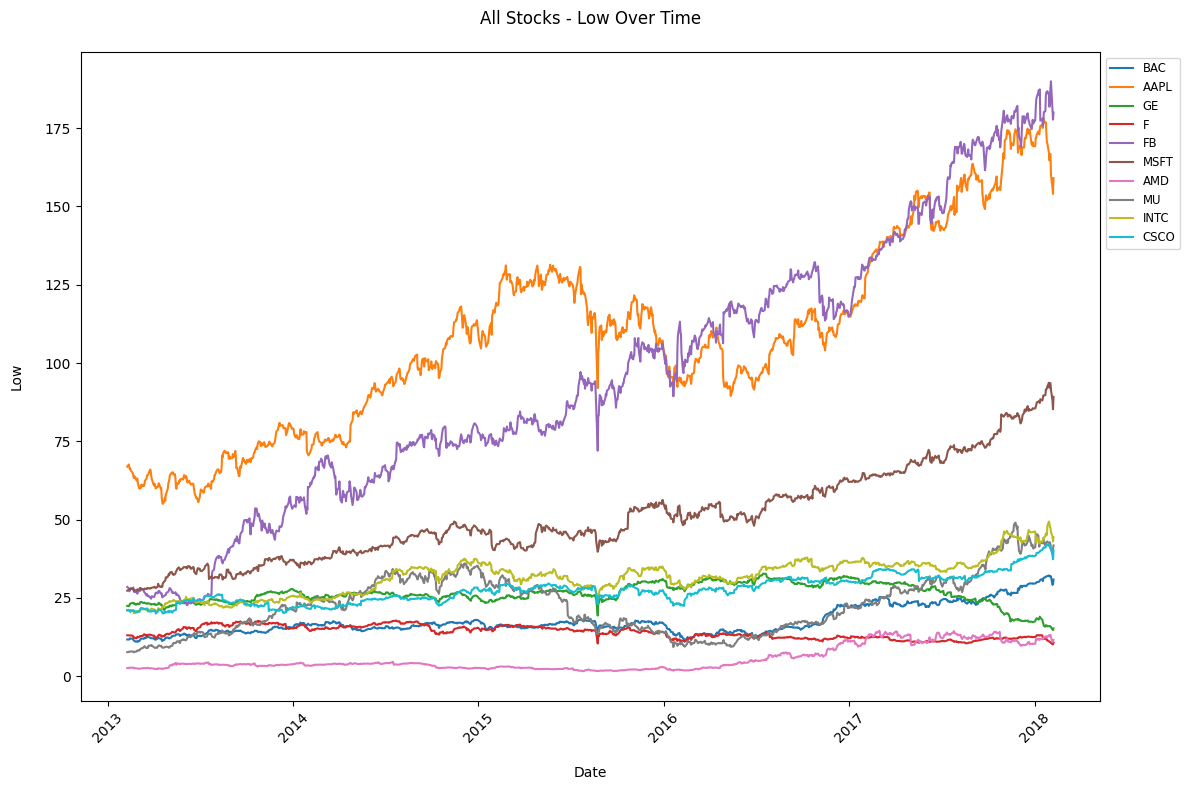

In [316]:
def visualize_all_stocks_prices(data, price_type):
    plt.figure(figsize=(12, 8))

    for stock in top_10_stocks:
        stock_data = data[data['Name'] == stock]
        plt.plot(stock_data['date'], stock_data[price_type], label=stock)

    plt.title(f'All Stocks - {price_type.capitalize()} Over Time', pad=20)
    plt.xlabel('Date', labelpad=15)
    plt.ylabel(price_type.capitalize(), labelpad=15)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualize Prices Over Time for All Stocks
price_types = ['close', 'open', 'high', 'low']
for price_type in price_types:
    visualize_all_stocks_prices(filtered_df, price_type)

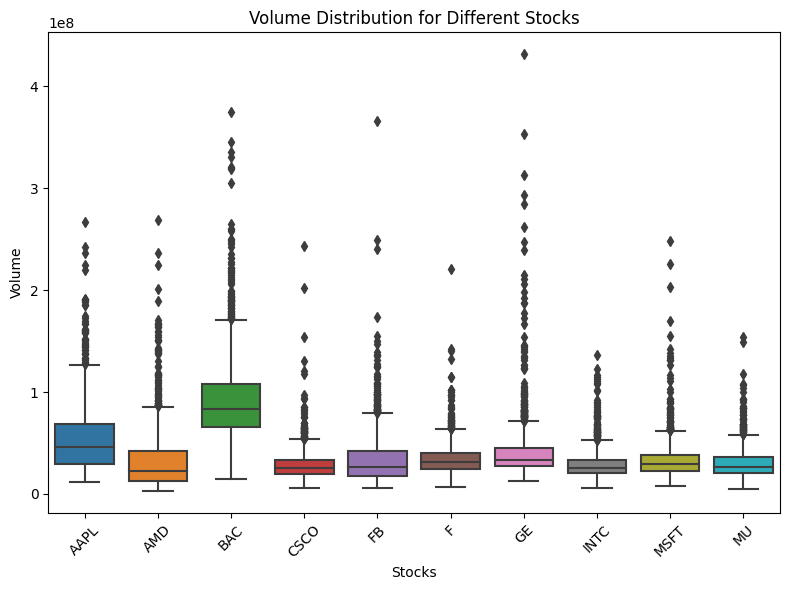

In [317]:
# Box plot for volume to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_df, x='Name', y='volume')
plt.title('Volume Distribution for Different Stocks')
plt.xlabel('Stocks')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


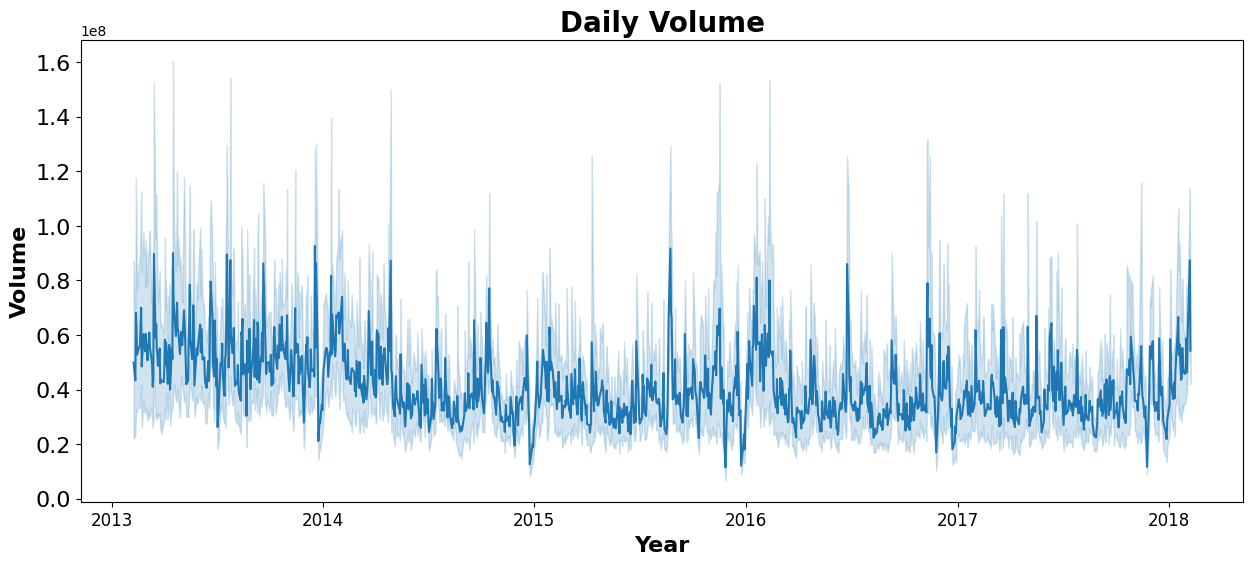

In [318]:
# Convert 'Date' column to datetime because it's not already in datetime format
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Plot Daily Volume Lineplot
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=filtered_df, x='date', y='volume')

# Formatting
ax.set_title('Daily Volume', fontsize=20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
ax.set_ylabel('Volume', fontsize=16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=12)  # Adjusting X-axis label size if needed
plt.show()


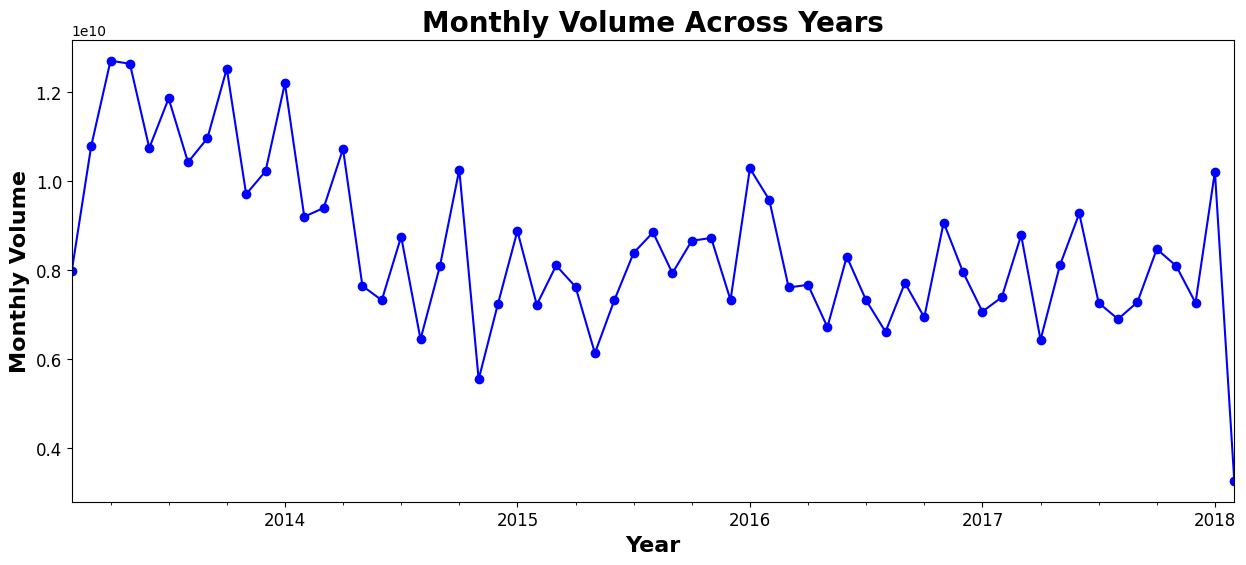

In [319]:
# New DataFrame to hold the monthly volume data
monthly_volume_df = filtered_df.copy()

# Convert 'Date' column to datetime if it's not already in datetime format
monthly_volume_df['date'] = pd.to_datetime(monthly_volume_df['date'])

# Set 'Date' column as the DataFrame's index for monthly volume data
monthly_volume_df.set_index('date', inplace=True)

# Resample data to monthly frequency and calculate the sum of volume for each month
monthly_volume = monthly_volume_df.resample('M')['volume'].sum()

# Plot Monthly Volume against Year
fig, ax = plt.subplots(figsize=(15, 6))
monthly_volume.plot(ax=ax, color='blue', marker='o')

# Formatting
ax.set_title('Monthly Volume Across Years', fontsize=20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
ax.set_ylabel('Monthly Volume', fontsize=16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=12)  # Adjust Y-axis label size if needed
plt.tick_params(axis='x', which='major', labelsize=12)  # Adjust X-axis label size if needed

plt.show()


SEASONALITY

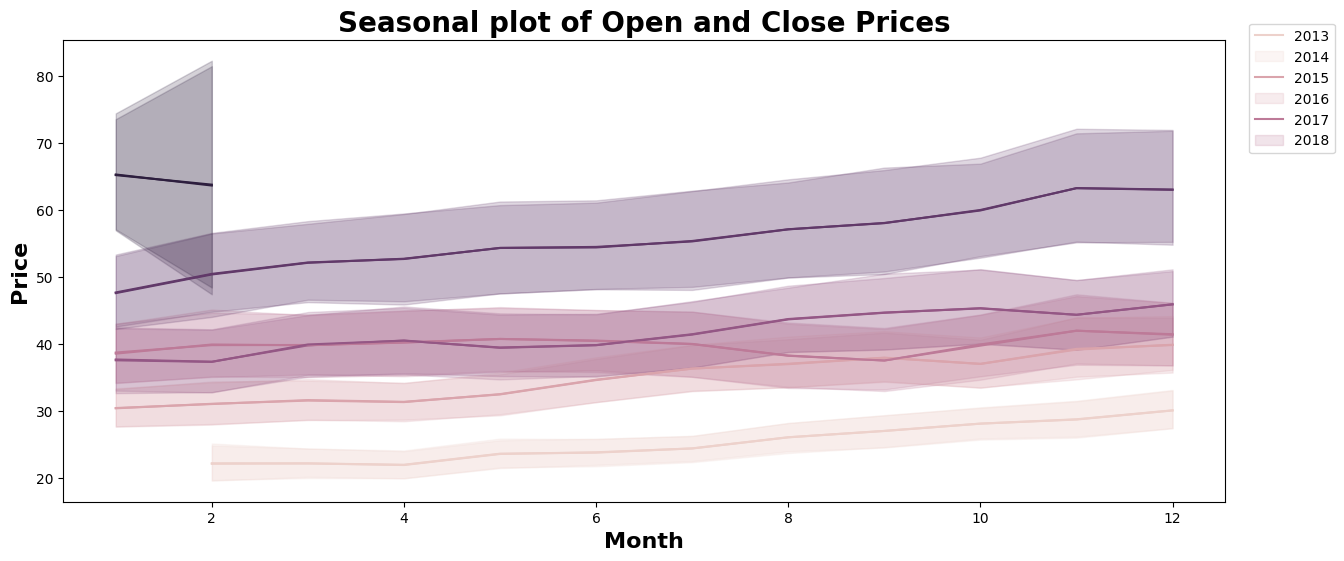

In [320]:
# Set the variable to plot
variables = ['open', 'close']  # Assuming 'open' and 'close' are the column names for opening and closing prices

# Convert 'Date' column to datetime if it's not already in datetime format
filtered_df = filtered_df.copy()  # Create a copy to avoid warnings while modifying the original DataFrame
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Extract month and year information using .dt accessor with .loc to set values
filtered_df.loc[:, 'Month'] = filtered_df['date'].dt.month
filtered_df.loc[:, 'Year'] = filtered_df['date'].dt.year

# Create a figure for the seasonal line plot for both 'Open' and 'Close' prices
plt.figure(figsize=(15, 6))

# Plot the seasonal line plot for both 'Open' and 'Close' prices
for variable in variables:
    sns.lineplot(data=filtered_df, x='Month', y=variable, hue='Year')

# Format the plot
plt.title('Seasonal plot of Open and Close Prices', fontsize=20, loc='center', fontweight='bold')
plt.xlabel('Month', fontsize=16, fontweight='bold')
plt.ylabel('Price', fontsize=16, fontweight='bold')
plt.legend(labels=[str(year) for year in filtered_df['Year'].unique()], bbox_to_anchor=(1.1, 1.05))

plt.show()


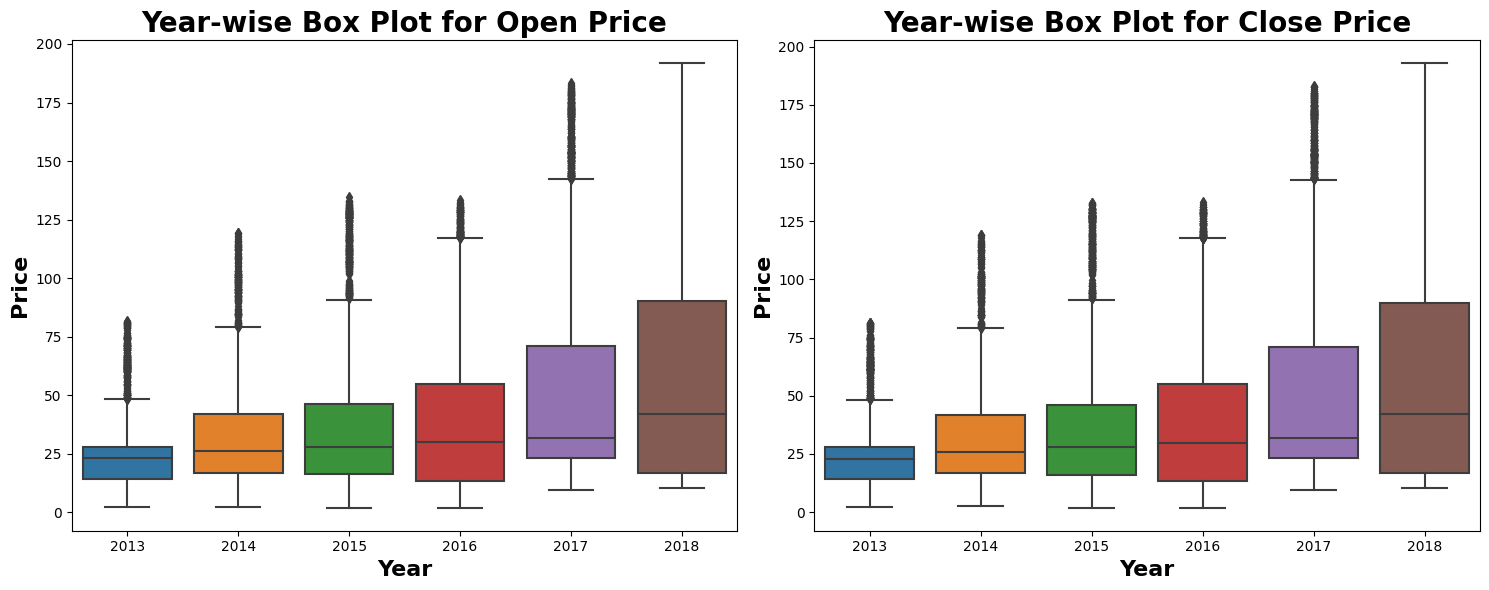

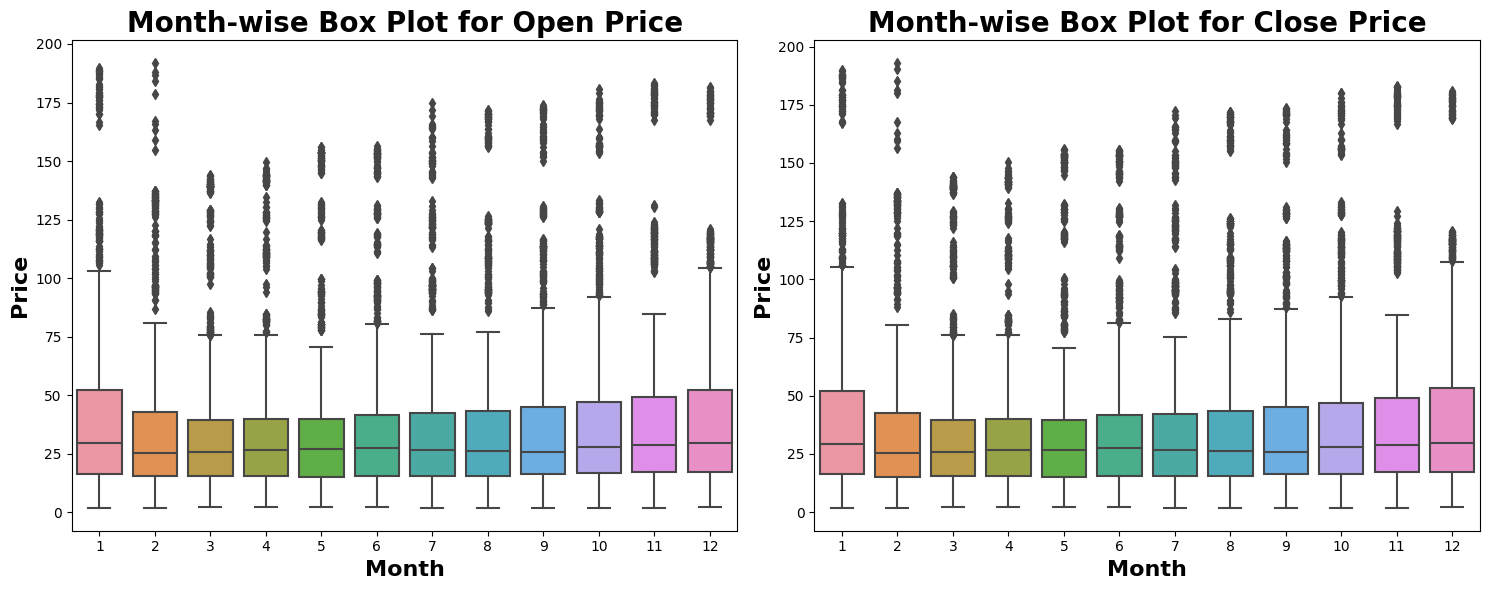

In [321]:
# Create a separate figure for the year-wise box plot for both 'Open' and 'Close' prices
plt.figure(figsize=(15, 6))

# Plot the year-wise box plot for both 'Open' and 'Close' prices
for i, variable in enumerate(variables, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=filtered_df, x='Year', y=variable)

    # Format the year-wise box plot
    plt.title(f'Year-wise Box Plot for {variable.capitalize()} Price', fontsize=20, loc='center', fontweight='bold')
    plt.xlabel('Year', fontsize=16, fontweight='bold')
    plt.ylabel('Price', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

# Create another separate figure for the month-wise box plot for both 'Open' and 'Close' prices
plt.figure(figsize=(15, 6))

# Plot the month-wise box plot for both 'Open' and 'Close' prices
for i, variable in enumerate(variables, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=filtered_df, x='Month', y=variable)

    # Format the month-wise box plot
    plt.title(f'Month-wise Box Plot for {variable.capitalize()} Price', fontsize=20, loc='center', fontweight='bold')
    plt.xlabel('Month', fontsize=16, fontweight='bold')
    plt.ylabel('Price', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

## Linear Regression Model

In [322]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iterations):
            model = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (model - y))
            db = (1/n_samples) * np.sum(model - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [323]:
# Selecting Features and Target
X = df[['open', 'high', 'low', 'volume']].values
y = df['close'].values

# Normalizing Features
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1234)

In [324]:
# Initializing and training the model
reg = LinearRegression(learning_rate=0.01, n_iterations=1000)
reg.fit(X_train, y_train)

# Predictions
predictions = reg.predict(X_test)

In [325]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [326]:
# Evaluating the model
mse_value = mse(y_test, predictions)
print("MSE:", mse_value)

MSE: 1.1819324659296324


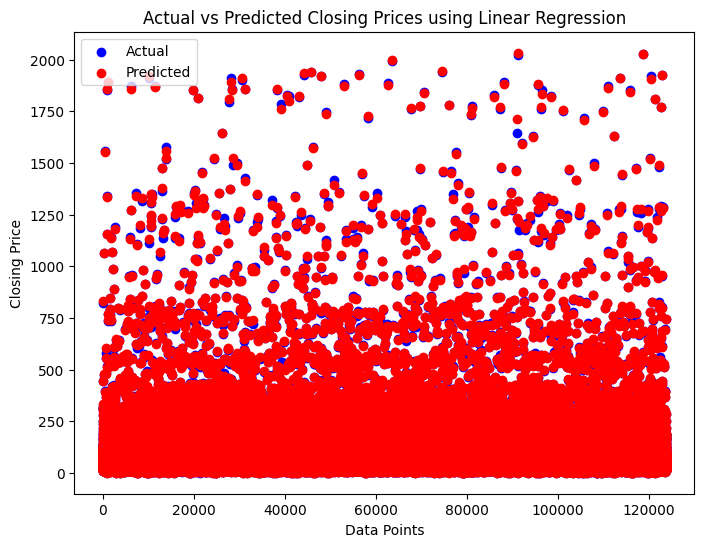

In [327]:
# Visualization
plt.figure(figsize=(8,6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted')
plt.title("Actual vs Predicted Closing Prices using Linear Regression")
plt.xlabel("Data Points")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

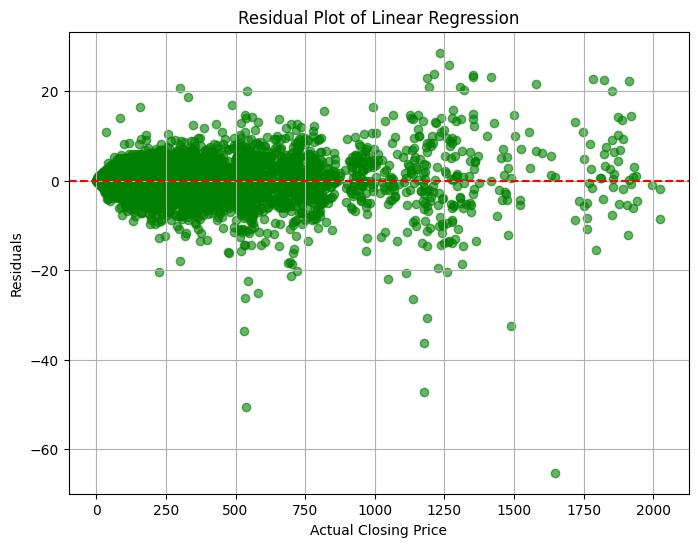

In [328]:
residuals = y_test - predictions

plt.figure(figsize=(8, 6))

# Scatter plot of residuals
plt.scatter(y_test, residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot of Linear Regression")
plt.xlabel("Actual Closing Price")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

Linear Regression Coefficients: [ 3.24135989e+01  3.24843209e+01  3.24839023e+01 -6.44257526e-03]
Linear Regression Intercept: 83.03936920003873


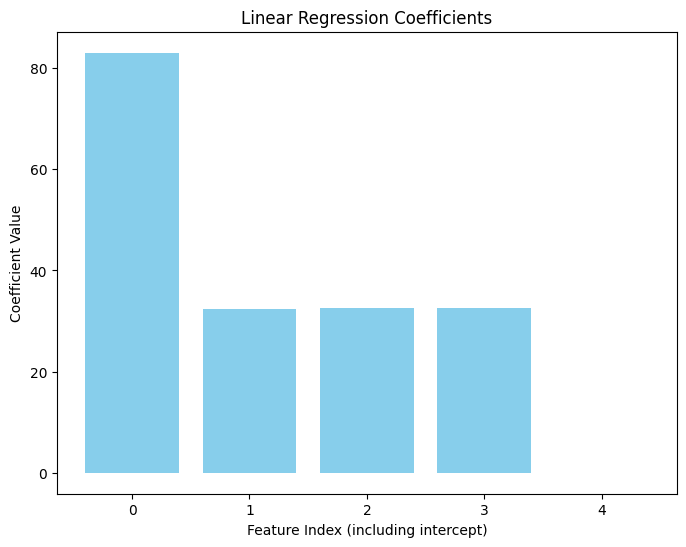

In [329]:
custom_reg = LinearRegression()
custom_reg.fit(X_train, y_train)

# Get coefficients and intercept
coefficients = custom_reg.weights
intercept = custom_reg.bias

# Print the coefficients
print("Linear Regression Coefficients:", coefficients)
print("Linear Regression Intercept:", intercept)

# Plotting the coefficients
n_features = len(coefficients)
plt.figure(figsize=(8, 6))
plt.bar(range(n_features + 1), np.concatenate(([intercept], coefficients)), color='skyblue')
plt.xlabel('Feature Index (including intercept)')
plt.ylabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.show()

## Ridge Regression Model

In [330]:
# Building and fitting the Ridge Regression Model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predicting the values
y_pred_ridge = ridge.predict(X_test)
print(y_pred_ridge)

[ 84.4932042   50.85742662  36.30422759 ... 286.05519289  54.26366393
  91.1635938 ]


In [331]:
# Calculating metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Mean Squared Error for Decision Tree Model: ", mse_ridge)
print("R-squared for Decision Tree Model: ", r2_ridge )

Ridge Regression Mean Squared Error for Decision Tree Model:  0.5055246211742461
R-squared for Decision Tree Model:  0.9999487823090522


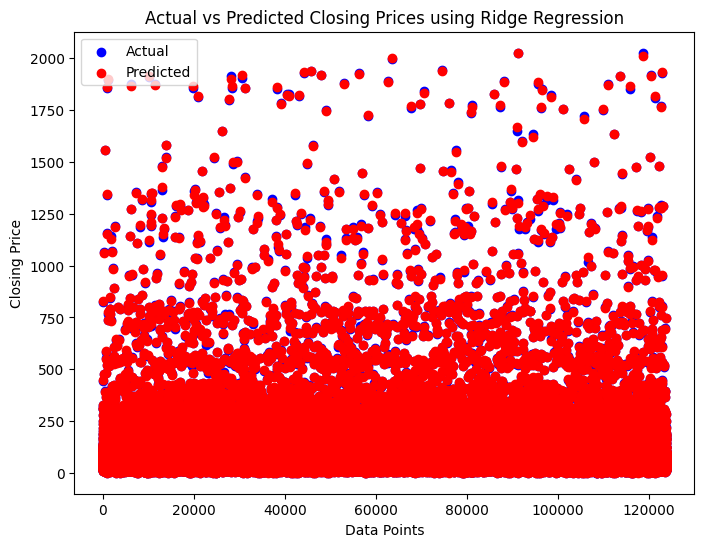

In [332]:
# Visualization
plt.figure(figsize=(8,6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_ridge)), y_pred_ridge, color='red', label='Predicted')
plt.title("Actual vs Predicted Closing Prices using Ridge Regression")
plt.xlabel("Data Points")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

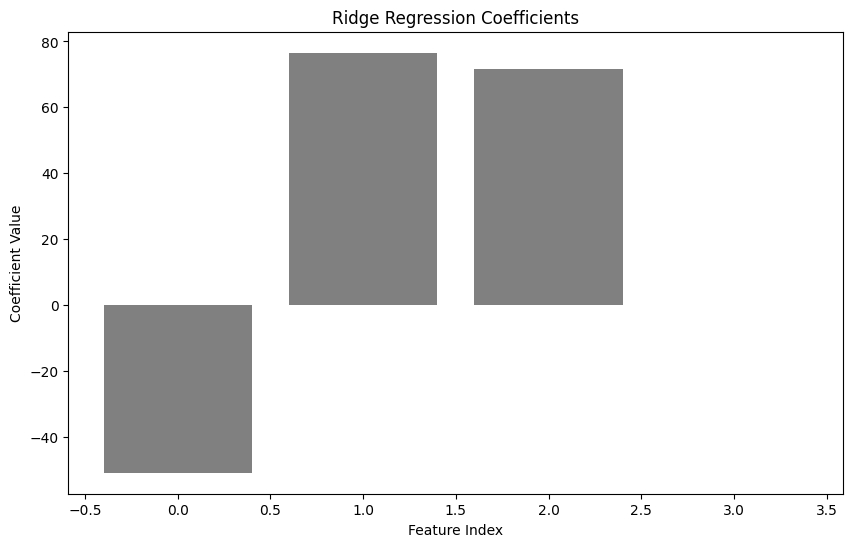

In [333]:
# Fit Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Get coefficients from Ridge Regression
ridge_coefficients = ridge.coef_

# Plotting Ridge Regression coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(ridge_coefficients)), ridge_coefficients, color='grey')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients')
plt.show()

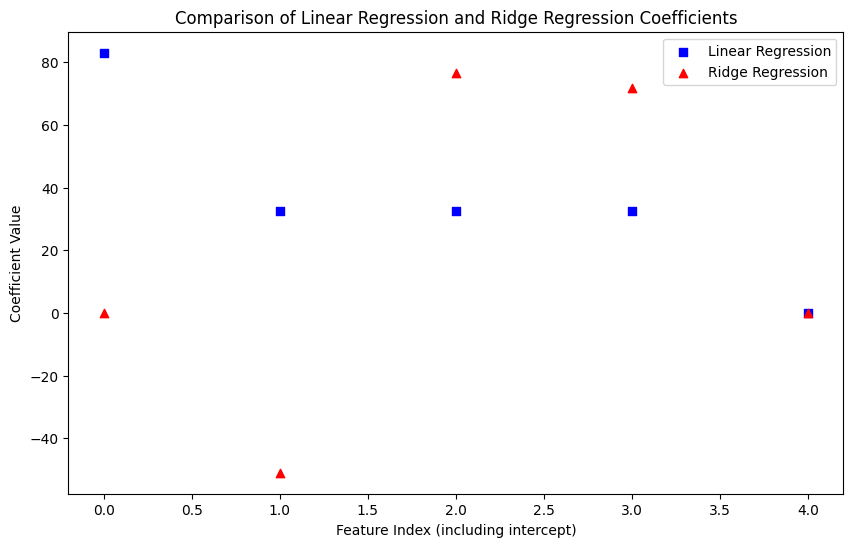

In [334]:
# Fit Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Get coefficients from Ridge Regression
ridge_coefficients = ridge.coef_

custom_reg = LinearRegression()
custom_reg.fit(X_train, y_train)

# Get coefficients for Linear Regression
linear_coefficients = custom_reg.weights
linear_intercept = custom_reg.bias

# Create indices for features (including the intercept)
n_features = len(linear_coefficients)
feature_indices = np.arange(n_features + 1)

# Scatter plot for Linear Regression coefficients
plt.figure(figsize=(10, 6))
plt.scatter(feature_indices, np.concatenate(([linear_intercept], linear_coefficients)), color='blue', label='Linear Regression',marker='s')

# Scatter plot for Ridge Regression coefficients
plt.scatter(feature_indices, np.concatenate(([0], ridge_coefficients)), color='red', label='Ridge Regression',marker='^')

plt.xlabel('Feature Index (including intercept)')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Linear Regression and Ridge Regression Coefficients')
plt.legend()
plt.show()

## Decision Tree

In [335]:
# Building and fitting the Decision Tree Model
decisionTree = DecisionTreeRegressor(random_state=42)
decisionTree.fit(X_train, y_train)
y_pred_dt = decisionTree.predict(X_test)
print(y_pred_dt)

[ 83.5   50.79  36.17 ... 286.49  54.54  91.58]


In [336]:
# Calculating metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Ridge Regression Mean Squared Error for Decision Tree Model: ", mse_dt)
print("R-squared for Decision Tree Model: ", r2_dt )

Ridge Regression Mean Squared Error for Decision Tree Model:  1.1443593284466027
R-squared for Decision Tree Model:  0.9998840581843838


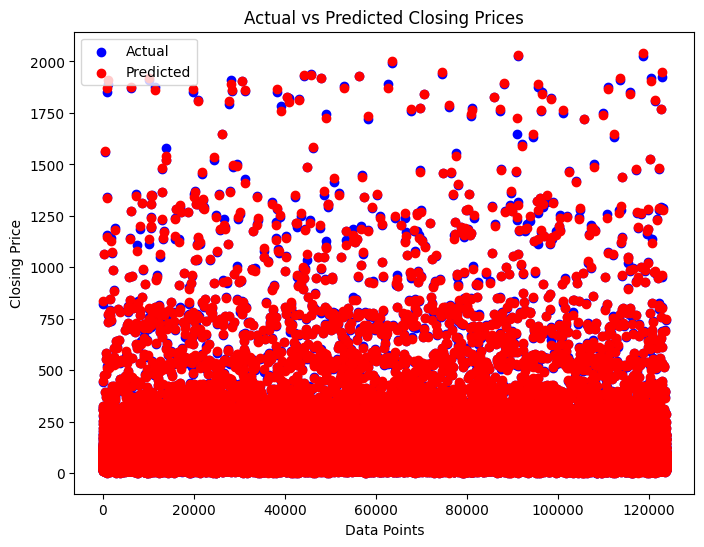

In [337]:
# Visualization
plt.figure(figsize=(8,6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_dt)), y_pred_dt, color='red', label='Predicted')
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Data Points")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

## ARIMA

In [338]:
# Filter for a single stock, e.g., 'AAPL'
df_aapl = df[df['Name'] == 'AAPL'].copy()

# Convert 'date' to datetime and set it as index
df_aapl['date'] = pd.to_datetime(df_aapl['date'])
df_aapl.set_index('date', inplace=True)

# Drop NaN values
df_aapl.dropna(inplace=True)

In [339]:
df_aapl.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


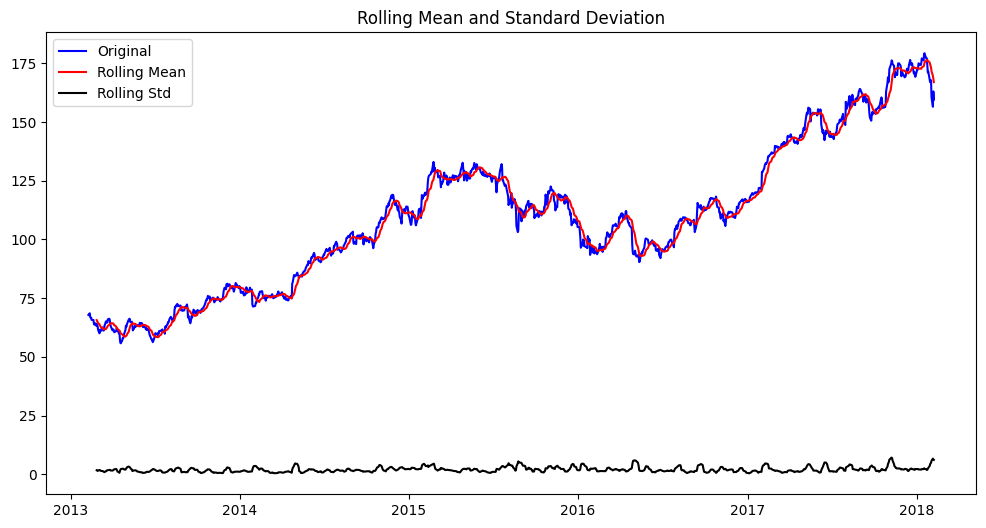

Results of Dickey-Fuller Test:
Test Statistics                  -0.665091
p-value                           0.855586
No. of lags used                  0.000000
Number of observations used    1258.000000
Critical Value (1%)              -3.435559
Critical Value (5%)              -2.863840
Critical Value (10%)             -2.567995
dtype: float64


In [340]:
def test_stationarity(timeseries):
    # Determining rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Plotting rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()

    # Dickey-Fuller test
    print("Results of Dickey-Fuller Test:")
    adft = adfuller(timeseries, autolag='AIC')
    output = pd.Series(adft[0:4], index=['Test Statistics', 'p-value', 'No. of lags used', 'Number of observations used'])
    for key, value in adft[4].items():
        output['Critical Value (%s)' % key] = value
    print(output)

test_stationarity(df_aapl['close'])

<Figure size 1600x900 with 0 Axes>

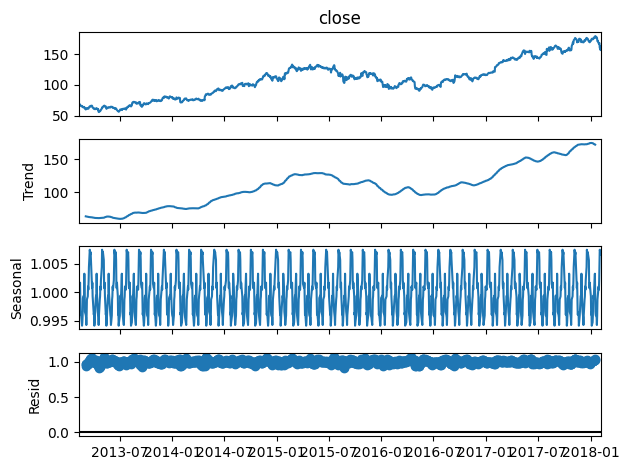

In [341]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_aapl['close'], model='multiplicative', period=30)
plt.figure(figsize=(16, 9))
fig = result.plot()
plt.show()

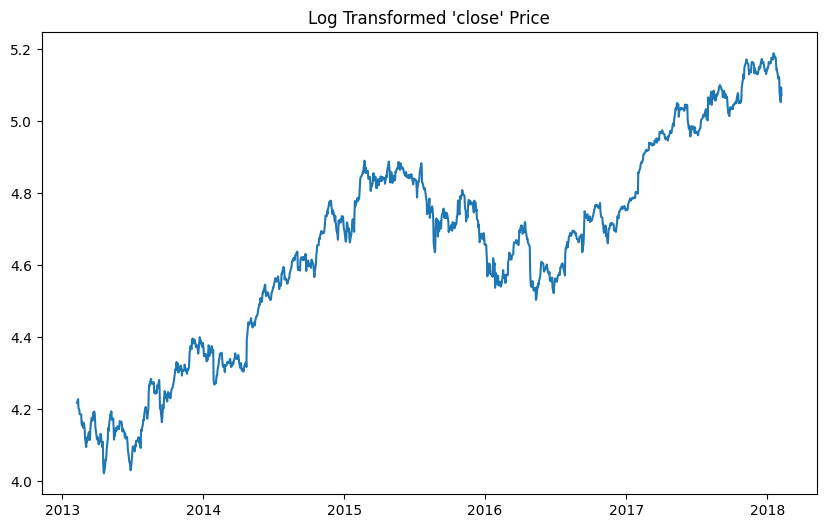

In [342]:
df_log = np.log(df_aapl['close'])
plt.figure(figsize=(10, 6))
plt.plot(df_log)
plt.title("Log Transformed 'close' Price")
plt.show()

In [343]:
df_log.head()

date
2013-02-08    4.217361
2013-02-11    4.227730
2013-02-12    4.202344
2013-02-13    4.200439
2013-02-14    4.199539
Name: close, dtype: float64

In [344]:
train_data, test_data = df_log[3:int(len(df_log)*0.7)], df_log[int(len(df_log)*0.7):]

In [345]:
pip install pmdarima

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4796.337, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4799.459, Time=0.40 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4798.334, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4798.330, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4800.364, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.134 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  878
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2401.182
Date:                Sun, 03 Dec 2023   AIC                          -4800.364
Time:                        07:38:11   BIC                          -4795.587
Sample:                             0   HQIC                         -4798.537
                                - 878                                  

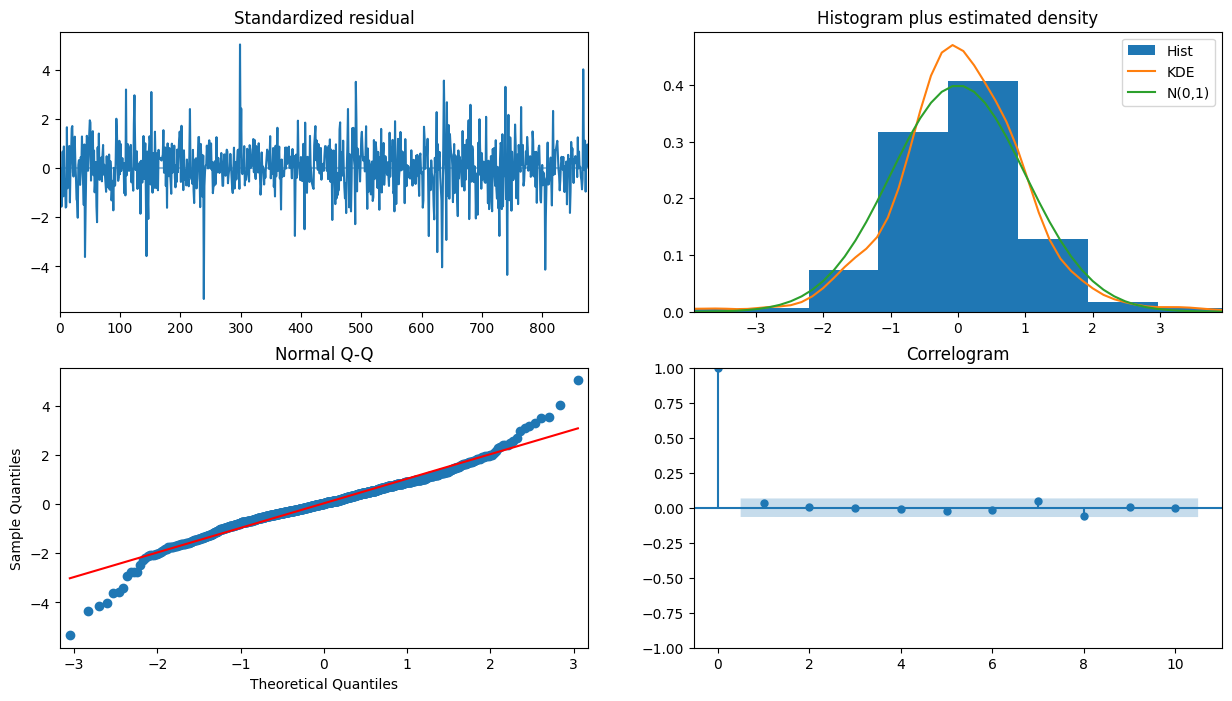

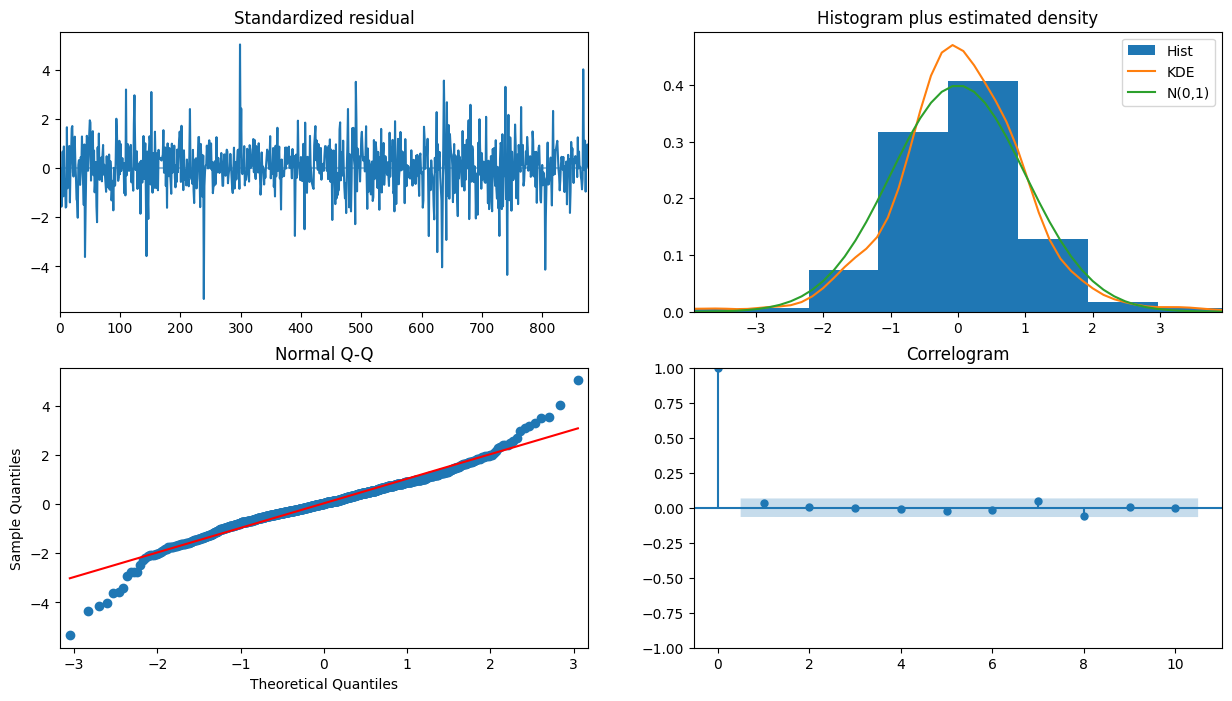

In [346]:
from pmdarima import auto_arima

model_autoARIMA = auto_arima(train_data, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=7, max_q=7, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=2,
                      D=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))

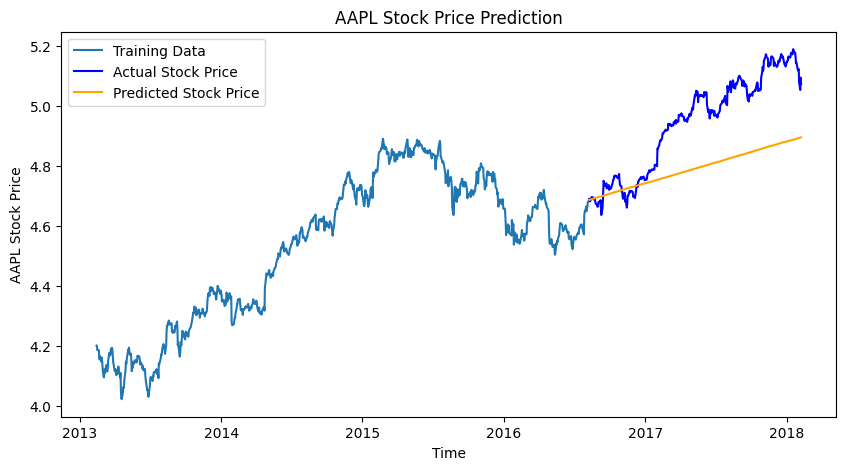

In [347]:
model = ARIMA(train_data, order=(2,2,2))
fitted = model.fit()

# Forecasting
start = len(train_data)
end = start + len(test_data) - 1
fc = fitted.predict(start=start, end=end)

# Plotting the forecast against the actual values
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(train_data, label='Training Data')
plt.plot(test_data, color='blue', label='Actual Stock Price')
plt.plot(test_data.index, fc, color='orange', label='Predicted Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()

In [348]:
mse = mean_squared_error(test_data, fc)
r_squared = r2_score(test_data, fc)
print('MSE of ARIMA Model:', mse)

MSE of ARIMA Model: 0.033771689437878824
